<a href="https://colab.research.google.com/github/alyrazik/OpenFDA/blob/main/FDA_drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploration of FDA drug labels dataset
#by Aly Abdelrazek

##FDA drug labels dataset
Public FDA data about nouns like drugs, devices, and foods.

# Cleaning/Wrangling


##Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling
import os
import io
import requests
from zipfile import ZipFile
import time
import json
from io import BytesIO
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction import text 
import pickle
from wordcloud import WordCloud

In [2]:
#url_path = "https://download.open.fda.gov/drug/label/"
#datasets_paths = [os.path.join (url_path, 'drug-label-00{:02d}-of-0009.json.zip'.format(i)) for i in range(1, 10,  1)] #reading the 9 zipped json files.

In [3]:
#datasets_paths

In [4]:
#res = requests.get(datasets_paths[0])
#zip_file = ZipFile(BytesIO(res.content)) #zip file object constructor accepts a file. If you wish to unzip on the fly from memory (to speed things up), we use BytesIO object which emulates a file but resides in memory
#file = zip_file.open(zip_file.namelist()[0]) #there is only one file inside every archive, let's open it for reading (default attribute is reading)
#data = file.read() #let's read the file.
#d = json.loads(data.decode("utf-8")) #since the output of unzipping is bytes stream, we decode it to text and then using json.loads, we save it to a python object.  (deserialize)
#now we want to save this d object into a pandas dataframe. Since it has a nested json structure, we use pd.json_normalize



In [5]:
#df = pd.json_normalize(d['results']) #we are only interested in results key and its values.

In [6]:
#print(df.columns[0:100])

In [7]:
#print(df.columns[100:])

In [8]:
#df1 = df['adverse_reactions']

In [9]:
#df1.isna().sum()
#df.shape

In [10]:
#df.isna().sum().sort_values()[0:10]

In [11]:
#+print(len(df.columns))

In [12]:
#https://stackoverflow.com/questions/57018859/valueerror-mixing-dicts-with-non-series-may-lead-to-ambiguous-ordering
#https://stackoverflow.com/questions/50167809/pandas-vs-json-library-to-read-a-json-file-in-python

#data = pd.json_normalize(datasets_paths[0])
#since we have nested json structure, the pd.read_json won't work. We have to use json.load instead. (which is usually faster too and robust as it won't break if one line is in error)


In [13]:
#data = json.load(open('json_file.json'))

#df = pd.DataFrame(data["result"])

#data = pd.DataFrame()
#t1 = time.time()
#for i in range(0, 9, 1):
#  print('Reading file number {}'.format(i+1))
#  r = requests.get(datasets_paths[i], stream=True)
#  zip_file = ZipFile(r) #creating the object
#  file_zipped = zip_file.open('drug-label-00{:02d}-of-0009.json'.format(i+1)) #access a member of the archive into file_zipped
#  file_data = file_zipped.read() #read file_data (output is in bytes)
#  d = json.loads(file_data.decode("utf-8")) #decoding the bytes into text so json.loads can read. 
#  #f =json.load(open(zip_file.open('drug-label-00{:02d}-of-0009.json'.format(i+1))))
#  data = pd.concat([data,pd.DataFrame(f['result'])])

  #data = pd.concat([data, pd.read_json(path_or_buf=datasets_paths[i], compression='zip')['results']['openfda']])
#loading_time = time.time()-t1
#print('Loading files in {:0.2f} seconds'.format(loading_time))

#https://download.open.fda.gov/drug/label/drug-label-0001-of-0009.json.zip

#**The next section is getting the download url for the adverse events files**

In [14]:
download_url = 'https://api.fda.gov/download.json' #this url contains all download links for openFDA dataset
events_paths = pd.json_normalize(json.load(BytesIO(requests.get(download_url).content))['results']['drug']['event']['partitions'])['file'] #navigating thru the json to get to adverse events download links (1051 file)
label_paths = pd.json_normalize(json.load(BytesIO(requests.get(download_url).content))['results']['drug']['label']['partitions'])['file'] #navigating thru the json to get to drug labels download links (1051 file)
#https://download.open.fda.gov/drug/event/all_other/drug-event-0001-of-0004.json.zip

In [15]:
label_paths

0    https://download.open.fda.gov/drug/label/drug-...
1    https://download.open.fda.gov/drug/label/drug-...
2    https://download.open.fda.gov/drug/label/drug-...
3    https://download.open.fda.gov/drug/label/drug-...
4    https://download.open.fda.gov/drug/label/drug-...
5    https://download.open.fda.gov/drug/label/drug-...
6    https://download.open.fda.gov/drug/label/drug-...
7    https://download.open.fda.gov/drug/label/drug-...
8    https://download.open.fda.gov/drug/label/drug-...
Name: file, dtype: object

In [16]:
res = requests.get(label_paths[0])
zip_file = ZipFile(BytesIO(res.content)) #zip file object constructor accepts a file. If you wish to unzip on the fly from memory (to speed things up), we use BytesIO object which emulates a file but resides in memory
file = zip_file.open(zip_file.namelist()[0]) #there is only one file inside every archive, let's open it for reading (default attribute is reading)
data = file.read() #let's read the file.
d = json.loads(data.decode("utf-8")) #since the output of unzipping is bytes stream, we decode it to text and then using json.loads, we save it to a python object.  (deserialize)
#now we want to save this d object into a pandas dataframe. Since it has a nested json structure, we use pd.json_normalize


In [17]:
df = pd.json_normalize(d['results']) #we are only interested in results key and its values.

In [18]:
df.shape

(20000, 161)

In [19]:
df.isna().sum().sort_values()[0:10]

effective_time                              0
set_id                                      0
id                                          0
version                                     0
spl_product_data_elements                  81
package_label_principal_display_panel      90
indications_and_usage                     993
dosage_and_administration                1078
warnings                                 3686
inactive_ingredient                      7099
dtype: int64

In [20]:
df_usage = df[[ 'set_id', 'indications_and_usage']] #'openfda.brand_name',

In [21]:
df_usage.isna().sum()

set_id                     0
indications_and_usage    993
dtype: int64

In [22]:
df_usage.shape

(20000, 2)

In [23]:
df_usage.dropna(inplace= True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_usage.shape

(19007, 2)

In [25]:
df_usage.head(10)

,set_id,indications_and_usage
0,a517190f-2a21-3016-e053-2a95a90abdf0,[Use Hand Sanitizer to help reduce bacteria th...
1,a5583d17-6022-1902-e053-2a95a90a9f01,[]
3,208abf83-febf-2399-e054-00144ff88e88,[Use To help reduce bacteria on the skin]
4,5f88b403-809c-4688-b508-b41eefb19bab,[INDICATIONS & USAGE Indications & Usage: Wet ...
5,df0af55f-f2af-4786-bbb3-5bc59570b3f2,[Uses Section Uses: SUNBURN PROTECTANT SPF 50....
7,9cd5908e-e05e-30af-e053-2a95a90a2c41,[Uses For handwashing to decrease bacteria on ...
8,a481d176-c647-4087-9642-7f57b60d83b2,[Uses For hand washing to decrease bacteria on...
9,7cf3460b-9de9-ba1c-e053-2a91aa0a9bbb,[■ children under 7 years of age: consult a do...
10,8b01e718-83b7-4f93-8fea-d0e37c756185,[INDICATIONS: May temporarily relieve weakness...
11,76b7cd4b-14e9-7025-e053-2991aa0a16fd,[Hydrocodone bitartrate and acetaminophen tabl...


#Cleaning

In [26]:
#the indications  and usage field is a list of items. I am here checking to see whether any list has more than one element
count =0
for i in range(1000):
  if len(df_usage['indications_and_usage'].iloc[i]) > 1 :
    count=count+1
print(count)

4


In [27]:
#let's conbine all list elements in one text
def create_one_text(l):
  '''returns a single text containing all texts from a list of multiple text items'''
  text=''
  list_length = len(l)
  for i in range (list_length):
    text= text+(l[i])
  return text


In [28]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

pre_round = lambda x: create_one_text(x)
round1 = lambda x: clean_text_round1(x)

In [29]:
df_usage_cleaned1 = pd.DataFrame(df_usage.indications_and_usage.apply(pre_round).apply(round1))
df_usage_cleaned1

,indications_and_usage
0,use hand sanitizer to help reduce bacteria tha...
1,
3,use to help reduce bacteria on the skin
4,indications usage indications usage wet the ...
5,uses section uses sunburn protectant spf prot...
...,...
19994,uses soothing temporary relief from minor ache...
19996,indications for temporary relief of liver cong...
19997,indication and usage cutis compositum® injecti...
19998,uses for cleansing hands and forearms prior to...


In [30]:
#now let's pickle the cleaned results so far
df_usage_cleaned1.to_pickle("corpus.pkl")

In [31]:
#Now let's represent the text to a document term matrix
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_usage_cleaned1.indications_and_usage)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_usage_cleaned1.index
data_dtm

,aas,aat,abacavir,abacavircontaining,abandon,abandoned,abbvie,abc,abciximab,abdomen,abdominal,abdominothoracic,abecb,abemaciclib,abeparvovecxioi,aberrations,abetahemolytic,abide,abies,abilify,ability,abimes,ablation,ablative,able,ablysinol,abnormal,abnormalities,abnormality,abnormally,aboce,abolish,abolishes,abord,abort,aborted,aborting,abortion,abovemedian,abovesince,...,zortress,zoster,zosyn,zovia,zygomycosis,µg,µgml,ºc,ºf,ßlactamase,ßlactamaseproducing,ßlactamresistant,écoulement,éternuements,être,únicamente,ünda,αketoglutaric,αketoglutaricum,βhemolytic,βlactam,βlactamase,βlactamasenegative,βlactamaseproducing,βlactamresistant,μgml,①after,①spray,②dip,②take,③leave,③spray,④let,ㆍrecommended,ㆍto,你可能有直腸不適或燒灼感,使用本產品時,ﬁrstline,ﬂora,ﬂuorouracil
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#now let's pickle the dtm for later use
data_dtm.to_pickle("dtm.pkl")

# Exploration

In [33]:
data = pd.read_pickle('dtm.pkl')

In [34]:
data = data.transpose()
data.head()

,0,1,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,19955,19956,19957,19958,19959,19960,19961,19962,19964,19965,19966,19967,19968,19969,19971,19972,19973,19974,19977,19978,19979,19980,19981,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19996,19997,19998,19999
aas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abacavir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abacavircontaining,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Find the top 10 words for each drug indications and usage
top_dict = {}
for drug in data.columns:
    top = data[drug].sort_values(ascending=False).head(10)
    top_dict[drug]= list(zip(top.index, top.values))

top_dict

{0: [('use', 2),
  ('reduce', 1),
  ('sanitizer', 1),
  ('soap', 1),
  ('hand', 1),
  ('water', 1),
  ('available', 1),
  ('help', 1),
  ('disease', 1),
  ('potentially', 1)],
 1: [('ﬂuorouracil', 0),
  ('faintingeyewash', 0),
  ('fallot', 0),
  ('falling', 0),
  ('fall', 0),
  ('falciparum', 0),
  ('fairskinned', 0),
  ('fairly', 0),
  ('faire', 0),
  ('fair', 0)],
 3: [('reduce', 1),
  ('bacteria', 1),
  ('use', 1),
  ('skin', 1),
  ('help', 1),
  ('faintness', 0),
  ('faintingeyewash', 0),
  ('faintingpvp', 0),
  ('faintinguses', 0),
  ('faintingwater', 0)],
 4: [('face', 2),
  ('usage', 2),
  ('indications', 2),
  ('hair', 2),
  ('body', 2),
  ('water', 1),
  ('wet', 1),
  ('appropriate', 1),
  ('pour', 1),
  ('towel', 1)],
 5: [('uses', 2),
  ('sunburn', 1),
  ('rays', 1),
  ('section', 1),
  ('uvauvb', 1),
  ('spf', 1),
  ('protects', 1),
  ('protectant', 1),
  ('ﬂuorouracil', 0),
  ('faintinguses', 0)],
 7: [('skin', 1),
  ('decrease', 1),
  ('handwashing', 1),
  ('uses', 1),
  

In [36]:
# Let's add the most common top words to the stop word list
# Let's first pull out the top words for each drug
words = []
for drug in data.columns:
    top = [word for (word, count) in top_dict[drug]]
    for t in top:
        words.append(t)
        
words

['use',
 'reduce',
 'sanitizer',
 'soap',
 'hand',
 'water',
 'available',
 'help',
 'disease',
 'potentially',
 'ﬂuorouracil',
 'faintingeyewash',
 'fallot',
 'falling',
 'fall',
 'falciparum',
 'fairskinned',
 'fairly',
 'faire',
 'fair',
 'reduce',
 'bacteria',
 'use',
 'skin',
 'help',
 'faintness',
 'faintingeyewash',
 'faintingpvp',
 'faintinguses',
 'faintingwater',
 'face',
 'usage',
 'indications',
 'hair',
 'body',
 'water',
 'wet',
 'appropriate',
 'pour',
 'towel',
 'uses',
 'sunburn',
 'rays',
 'section',
 'uvauvb',
 'spf',
 'protects',
 'protectant',
 'ﬂuorouracil',
 'faintinguses',
 'skin',
 'decrease',
 'handwashing',
 'uses',
 'repeated',
 'recommended',
 'use',
 'bacteria',
 'faintness',
 'faintingwater',
 'decrease',
 'bacteria',
 'skin',
 'uses',
 'hand',
 'washing',
 'ﬂuorouracil',
 'faintingpvp',
 'faintinguses',
 'faintingwater',
 'doctor',
 'directed',
 'children',
 'symptoms',
 'age',
 'consult',
 'accur',
 'years',
 'tablet',
 'fall',
 'homeopathic',
 'accepte

In [37]:
Counter(words).most_common() #aggregating the list 

[('use', 4579),
 ('uses', 4212),
 ('skin', 3133),
 ('indicated', 2953),
 ('treatment', 2815),
 ('indications', 2598),
 ('fairskinned', 2329),
 ('fairly', 2226),
 ('falciparum', 2157),
 ('patients', 2050),
 ('ﬂuorouracil', 1916),
 ('tablets', 1859),
 ('helps', 1850),
 ('faire', 1843),
 ('fall', 1766),
 ('relief', 1749),
 ('bacteria', 1730),
 ('minor', 1707),
 ('temporarily', 1679),
 ('fair', 1609),
 ('relieves', 1579),
 ('faintinguses', 1567),
 ('help', 1527),
 ('faintingwater', 1518),
 ('symptoms', 1494),
 ('prevent', 1492),
 ('faintingpvp', 1436),
 ('reduce', 1430),
 ('faintness', 1339),
 ('hand', 1328),
 ('faintingeyewash', 1310),
 ('risk', 1291),
 ('falling', 1257),
 ('disease', 1198),
 ('associated', 1188),
 ('usage', 1152),
 ('pain', 1113),
 ('used', 1094),
 ('decrease', 1045),
 ('sanitizer', 1032),
 ('water', 998),
 ('faintingbzk', 995),
 ('therapy', 984),
 ('directed', 867),
 ('cold', 862),
 ('usp', 848),
 ('temporary', 819),
 ('available', 798),
 ('sun', 783),
 ('throat', 780),

In [89]:
#why skin is on the top list
cut_count = np.quantile([count for word, count in Counter(words).most_common()], q = 1)
add_stop_words = [word for word, count in Counter(words).most_common() if count > cut_count]
len(add_stop_words)

0

In [90]:
# Let's update our document-term matrix with the new list of stop words

# Read in cleaned data
data_clean = pd.read_pickle('corpus.pkl')



In [91]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)



In [92]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.indications_and_usage)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index



In [93]:
# Pickle it for later use
#pickle.dump(cv, open("cv_stop.pkl", "wb"))
#data_stop.to_pickle("dtm_stop.pkl")

In [94]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


In [95]:
data_clean.head()

,indications_and_usage
0,use hand sanitizer to help reduce bacteria tha...
1,
3,use to help reduce bacteria on the skin
4,indications usage indications usage wet the ...
5,uses section uses sunburn protectant spf prot...


In [101]:
data_clean['indications_and_usage'][1]

''

ValueError: ignored

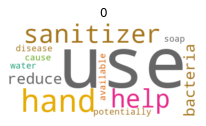

In [100]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

#full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, drug in enumerate(data.columns[0:10]):
    wc.generate(data_clean['indications_and_usage'][drug])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data.columns[index])
    
plt.show()

##Prescriptive

## Descriptive

##Predictive

# Conclusions